In [1]:
# %pip install seaborn

import pandas as pd
import seaborn as sns

## Understand Data

In [2]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [3]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

In [4]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Label Encoding

In [5]:
# %pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 
                       'education', 
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native-country', 
                       'income']

for col in categorical_columns:
    training_data[col] = label_encoder.fit_transform(training_data[col])

# Split the data into features (X) and target variable (y)
X = training_data.drop('income', axis=1)
y = training_data['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classification Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
   
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Pattern Extraction

In [20]:
# Get feature importances
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
            Feature  Importance
2           fnlwgt    0.170591
0              age    0.155017
10    capital-gain    0.115559
7     relationship    0.095033
4    education-num    0.089114
12  hours-per-week    0.083595
5   marital-status    0.069766
6       occupation    0.065885
1        workclass    0.039233
11    capital-loss    0.035669
3        education    0.033882
9              sex    0.016821
13  native-country    0.015387
8             race    0.014447


In [8]:
# Prediction Probabilities
predicted_probabilities = rf_model.predict_proba(X_test)

# Display the predicted probabilities for the positive class
print("Prediction Probabilities for Positive Class:\n")
for item in predicted_probabilities:
    print(item)

Prediction Probabilities for Positive Class:

[1. 0.]
[0.68 0.32]
[0.4 0.6]
[0.99 0.01]
[0.9 0.1]
[0.15 0.85]
[0.04 0.96]
[1. 0.]
[0.97 0.03]
[0.36 0.64]
[0.96 0.04]
[0.99 0.01]
[0.55 0.45]
[0.92 0.08]
[0.92 0.08]
[0.99 0.01]
[0.25 0.75]
[0.23 0.77]
[0.05 0.95]
[0.84 0.16]
[0.76 0.24]
[0.98 0.02]
[0.62 0.38]
[1. 0.]
[0.9 0.1]
[0.88 0.12]
[0.99 0.01]
[0.98 0.02]
[0.79 0.21]
[1. 0.]
[0.2 0.8]
[0.5 0.5]
[0.99 0.01]
[1. 0.]
[0.95 0.05]
[0.14 0.86]
[1. 0.]
[0.93 0.07]
[1. 0.]
[0.96 0.04]
[0.97 0.03]
[0.93 0.07]
[0.01 0.99]
[1. 0.]
[0.35 0.65]
[0.76 0.24]
[0.91 0.09]
[1. 0.]
[0.85 0.15]
[0.7 0.3]
[1. 0.]
[1. 0.]
[0.89 0.11]
[0.99 0.01]
[0.83 0.17]
[1. 0.]
[0.32 0.68]
[1. 0.]
[0.76 0.24]
[0.67 0.33]
[0.97 0.03]
[0.97 0.03]
[0.79 0.21]
[0.64 0.36]
[0.99 0.01]
[1. 0.]
[0.96 0.04]
[1. 0.]
[0.33 0.67]
[0.91 0.09]
[0.74 0.26]
[1. 0.]
[1. 0.]
[0.62 0.38]
[0.96 0.04]
[0.85 0.15]
[0.95 0.05]
[0.98 0.02]
[0.75 0.25]
[1. 0.]
[0.12 0.88]
[0.94 0.06]
[0.04 0.96]
[0.03 0.97]
[0.9 0.1]
[0.98 0.02]
[0.99 0.

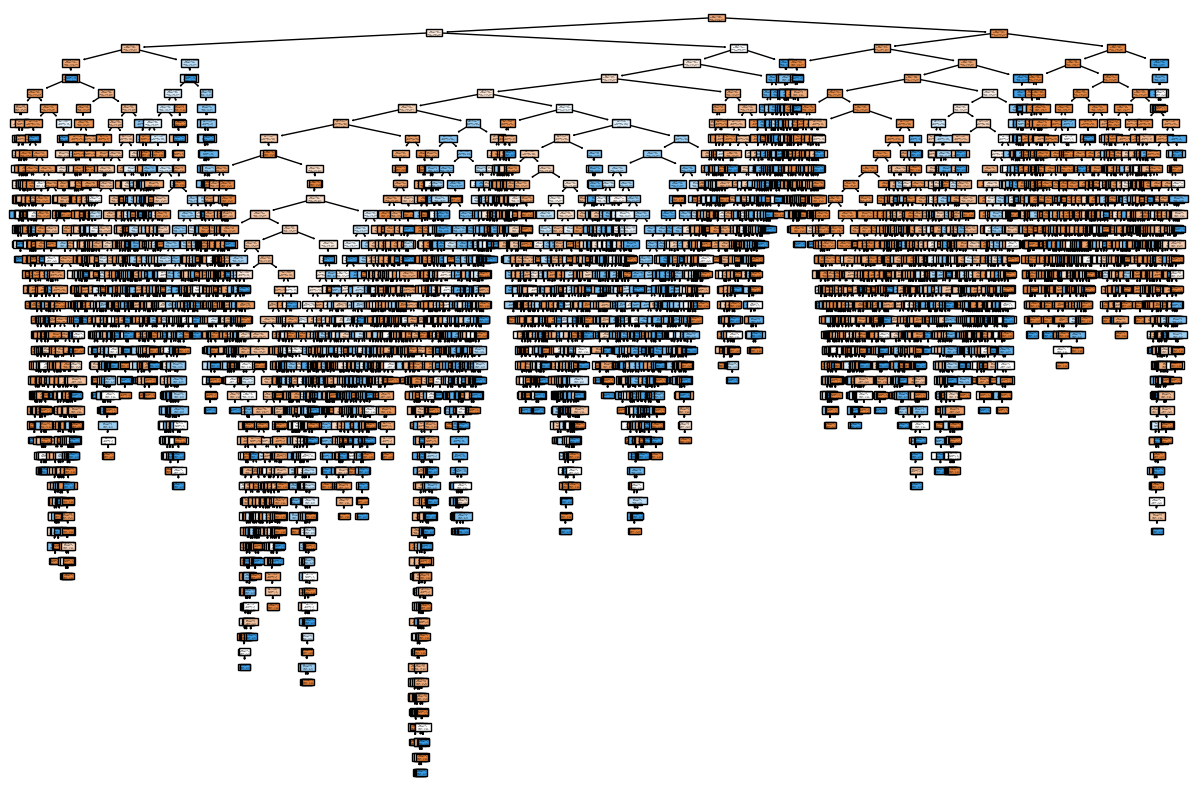

In [9]:
# Visualize Individual Trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the trees in the Random Forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, class_names=["<=50K", ">50K"])
plt.show()


## Visualization

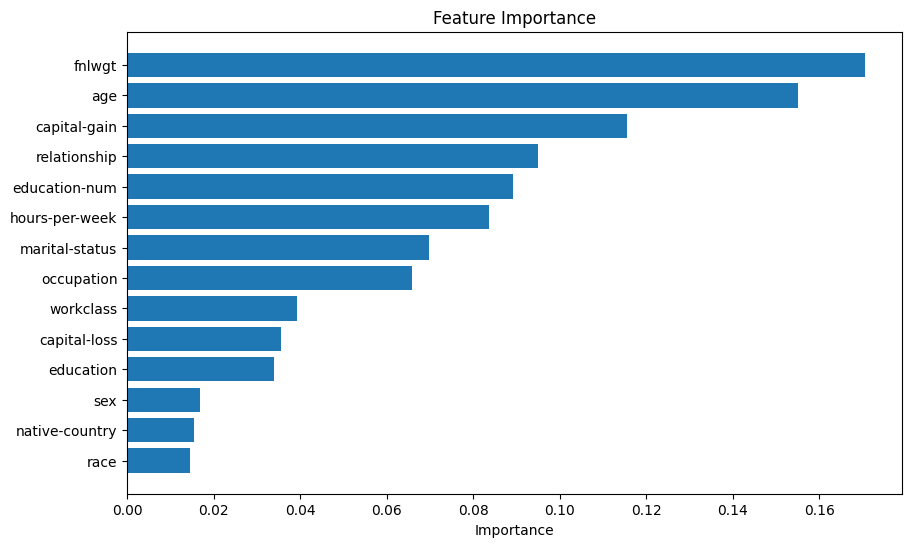

In [10]:
import matplotlib.pyplot as plt

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## Testing Dataset Preprocessing

In [11]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
data_test = pd.read_csv('adult.test', names=names, skipinitialspace=True)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [12]:
# Drop any rows with missing values
data_test = data_test.dropna()

# Normalizing the data 
data_test= data_test[data_test.age !="|1x3 Cross validator"]

most_common_workclass = data_test["workclass"].mode()[0]
most_common_occupation = data_test["occupation"].mode()[0]
most_common_country = data_test["native-country"].mode()[0]

data_test['workclass'].replace('?', most_common_workclass, inplace=True)
data_test['occupation'].replace('?', most_common_occupation, inplace=True)
data_test['native-country'].replace('?', most_common_country, inplace=True)

data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Label Encoding

In [26]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 
                       'education', 
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native-country', 
                       'income']

for col in categorical_columns:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Split the data into features (X) and target variable (y)
X = data_test.drop('income', axis=1)
y = data_test['income']

## Predict the income level with test dataset

In [27]:
# Make predictions on the test set
y_pred = rf_model.predict(X)

## Model Performance Evaluation

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y, y_pred)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y, y_pred)
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281

Accuracy: 0.8539401756648854
Precision: 0.7295184490306441
Recall: 0.6066042641705668
F1-Score: 0.6624077228847245
Confusion Matrix:
 [[11570   865]
 [ 1513  2333]]


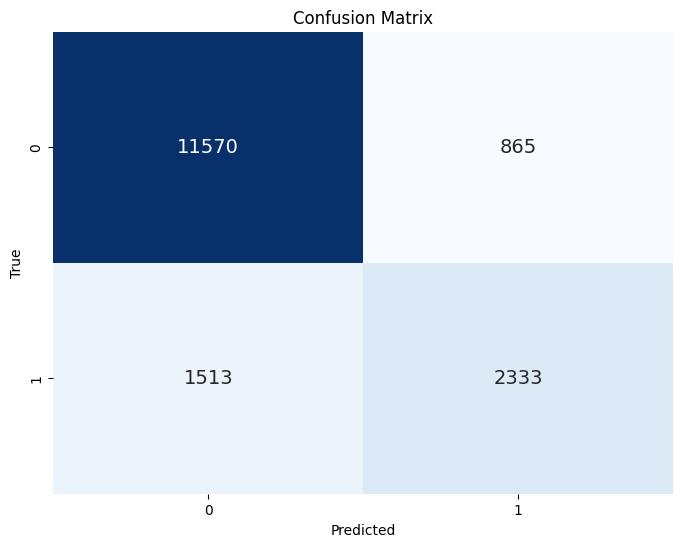

In [32]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()